In [19]:
#@title Установка нужных версий библиотек
# !wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt
# !pip install -r requirements.txt

## Линейная регрессия

**Линейная регрессия** — модель зависимости переменной от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Ниже на графике представлена линейная регрессия переменной $y$ от переменной $x$.

Есть коэффициент наклона $a$ и есть коэффициент сдвига $b$.

Эти значения могут изменяться как угодно.

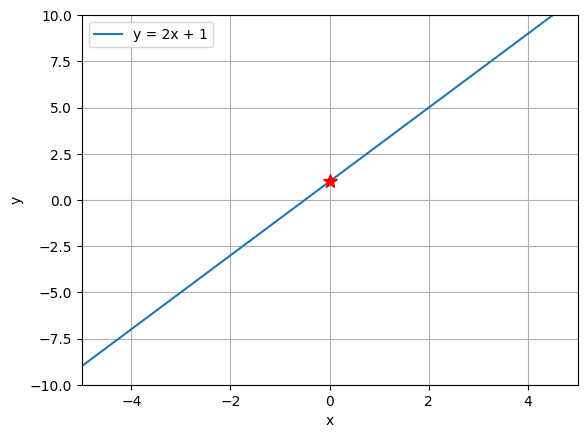

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6)
a = 2
b = 1

y = a * x + b
plt.plot(x, y, label=f'y = {a}x + {b}')
plt.plot([0], [b], 'r*', markersize=10)
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-10, 10);plt.xlim(-5, 5)
plt.grid()
plt.legend();

In [21]:
def draw_ax(a, b, x, ax, ylim=5):
    y = a * x + b
    ax.plot(x, y, label=f'y = {a}x + {b}')
    ax.plot([0], [b], 'r*', markersize=10)
    
    ax.plot([0, 1], [b, b], 'y', linewidth=4)
    ax.plot([1, 1], [b, b+a], 'y', linewidth=4)

    ax.set_ylabel('y'); ax.set_xlabel('x')
    ax.set_ylim(-ylim, ylim); ax.set_xlim(-5, 5)
    ax.grid()
    ax.legend(prop={'size': 15})

**Сдвиг**:
- Если у нас не будет сдвига (коэффициента $b$), то линяя будет проходить через точку (0, 0).
- Если коэффициент сдвига не равен 0, а к примеру, равен 2, то линяя будет проходить через точку (0, 2).

**Коэффициент наклона**:
- Если у нас не будет коэффициента наклона, то линяя будет параллельна оси Ох.
- Если коэффициент наклона больше 0, то линяя идет на увеличение, при этом чем больше коэффициент, тем более наклон крутой.
- Если коэффициент наклона меньше 0, то линяя идет на уменьшение, при этом чем меньше коэффициент, тем более наклон крутой.



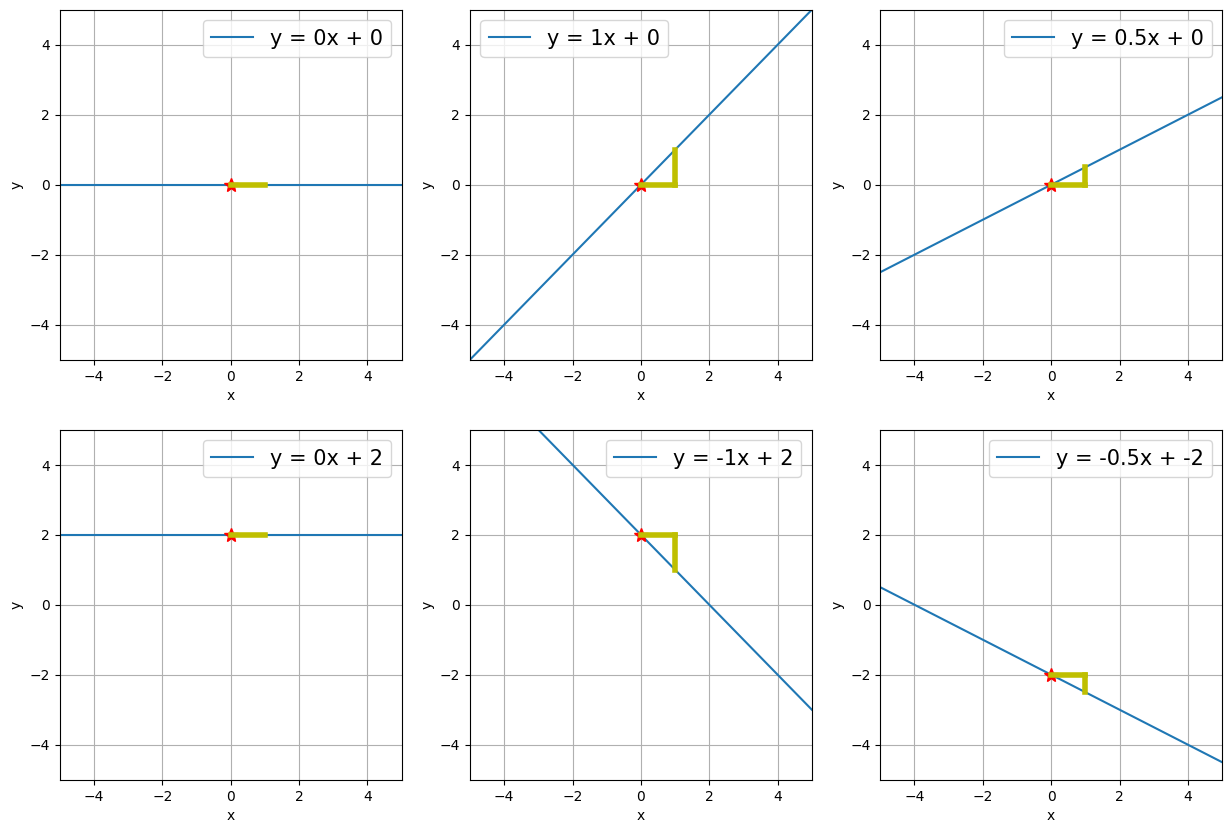

In [22]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 3, figsize=(15, 10))
x = np.arange(-6, 6)

# 1row, 1column
a, b = 0, 0
draw_ax(a, b, x, ax[0][0])

# 1row, 2column
a, b = 1, 0
draw_ax(a, b, x, ax[0][1])

# 1row, 3column
a, b = 0.5, 0
draw_ax(a, b, x, ax[0][2])


# 2row, 1column
a, b = 0, 2
draw_ax(a, b, x, ax[1][0])

# 2row, 2column
a, b = -1, 2
draw_ax(a, b, x, ax[1][1])

# 2row, 3column
a, b = -0.5, -2
draw_ax(a, b, x, ax[1][2])

С самим уравнением прямой разобрались, теперь давайте обучим линейную регрессию, ведь по факту она и есть прямая.

## Получение данных

Возьмем и сами нагенирируем себе данные и обучим на них линейную модель.

In [23]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

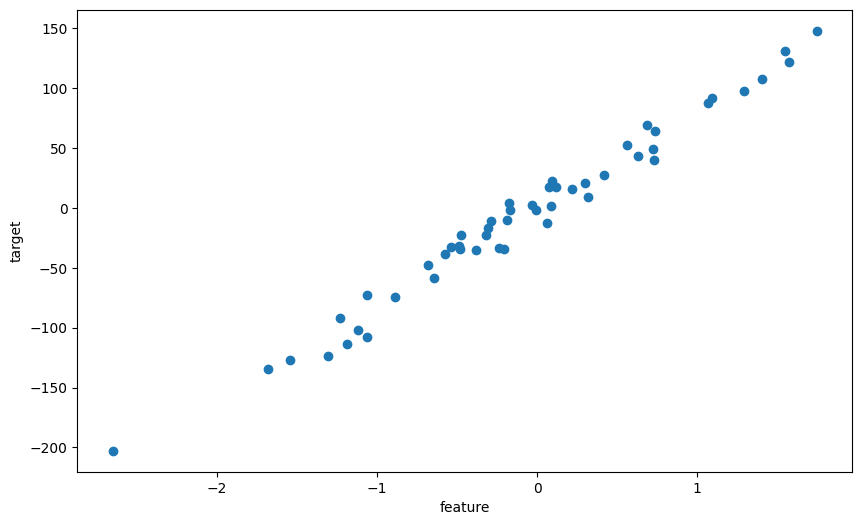

In [24]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

## Одномерная линейная регрессия

#### Из sklearn

Возьмем модель `LinearRegression` из `sklearn` из модуля `linear_model`.

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

И передадим в неё в метод `fit` данные, которые получили выше.

In [26]:
model.fit(X, y)

LinearRegression()

Всё, модель обучилась, это происходит очень быстро. Обучение линейной модели заключается в поиске коэффициентов, конкретно в нашей задаче - это коэффициент сдвига и наклона.

Можем эти коэффициента отобразить, если возьмем у модели атрибут `coef_` и `intercept_`.

In [27]:
model.coef_, model.intercept_

(array([80.41862354]), 0.1817188754210024)

Вот и получили два коэффициента, осталось их подставить в уравнение прямой и будет готовая линейная модель.

In [28]:
model_a = model.coef_[0]
model_b = model.intercept_

Данная прямая наилучшим образом прошла вдоль точек из обучающей выборки.

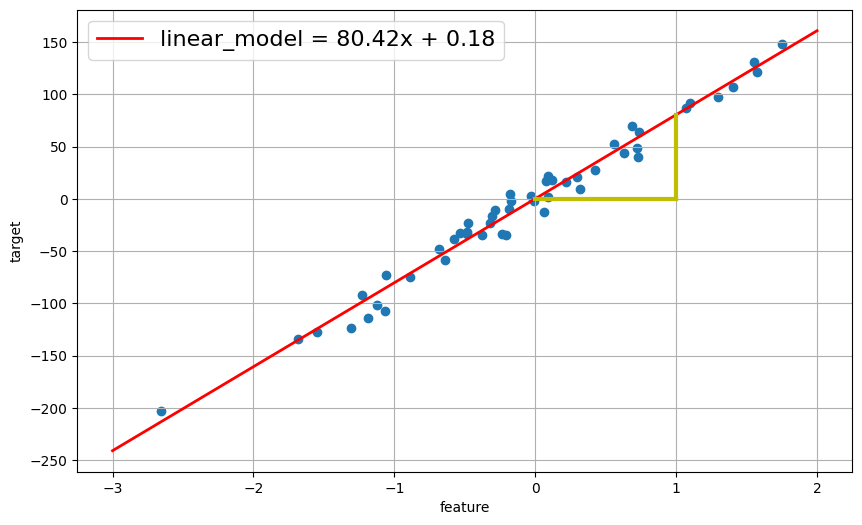

In [29]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y) 
plt.plot([0, 1], [model_b, model_b], 'y', linewidth=3)
plt.plot([1, 1], [model_b, model_b+model_a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

Чтобы теперь сделать предсказания этой моделью достаточно вызвать метод `predict` и передать в него данные.

In [30]:
model.predict(X[:1])

array([50.85187092])

In [31]:
X[:1]

array([[0.63007982]])

Или же можем можем сделать точно такое же предсказание, если возьмем коэффициент наклона и умножим на значение признака и прибавим к этому коэффициент сдвига. 

In [32]:
model_a * X[:1] + model_b

array([[50.85187092]])

А что значит это "наилучшим образом вдоль точек из обучающей выборки"? Как подсчитался этот наилучший образ?

Чем построенная линия ниже, хуже первой?

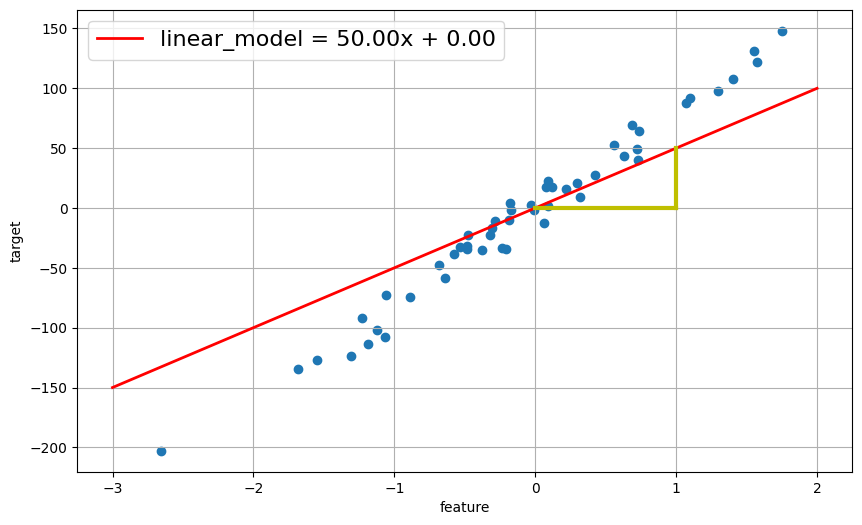

In [33]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
a, b = 50, 0
model_y = a * x + b

plt.plot(x, model_y, linewidth=2, c='r', label=f'linear_model = {a:.2f}x + {b:.2f}')
plt.scatter(X, y) 
plt.plot([0, 1], [b, b], 'y', linewidth=3)
plt.plot([1, 1], [b, b+a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

А визуально она допускает больше отклонений от синих точек, чем первая. Давайте сравним не визуально, а с помощью цифр.

Для начала составим все данные в одну таблицу:
- `X` - это точки, на которых строим модель
- `y` - это настоящая целевая переменная, которую хотим предсказать
- `pred_model_good` - это значения на линии по координатам `X` первой модели, имеем предсказания модель `LinearRegression`
- и `pred_bad_model` - это значения на линии по координатам `X` второй модели, которая создана вручную, а не силами `sklearn`

In [34]:
import pandas as pd

df = pd.DataFrame({
    'X': X[:,0],
    'y': y,
    'pred_good_model': model_a * X[:,0] + model_b,
    'pred_bad_model': a * X[:,0] + b
})


df.head()

,X,y,pred_good_model,pred_bad_model
0,0.630080,43.654341,50.851871,31.503991
1,-1.061634,-72.682350,-85.193462,-53.081722
2,0.296347,21.196446,24.013545,14.817355
3,1.402771,107.587651,112.990641,70.138556
4,0.689682,69.620632,55.645021,34.484116


Посчитаем отклонения предсказаний от истины для каждой модели.

И здесь на первых 5 объектах тоже видим, что на `sklearn` модели более маленькие отклонения, нежели на второй модели.

In [35]:
df['residual_good'] = df['pred_good_model'] - df['y']
df['residual_bad'] = df['pred_bad_model'] - df['y']
df.head()

,X,y,pred_good_model,pred_bad_model,residual_good,residual_bad
0,0.630080,43.654341,50.851871,31.503991,7.197530,-12.150350
1,-1.061634,-72.682350,-85.193462,-53.081722,-12.511112,19.600628
2,0.296347,21.196446,24.013545,14.817355,2.817099,-6.379091
3,1.402771,107.587651,112.990641,70.138556,5.402991,-37.449095
4,0.689682,69.620632,55.645021,34.484116,-13.975611,-35.136517


Давайте теперь на всех объектах посчитаем метрику, которая будет позволять оценивать качество построенных линий.

Возьмем MSE - mean squared error, более подробно про неё рассказываю в этом [видео](https://youtu.be/vh2smjQyhp8) и в этом [ноутбуке](https://colab.research.google.com/drive/14Oxi6sI25mP4JbovLiJ57e7H5sbN2I3p).

MSE на sklearn модели равняется.

In [36]:
np.mean(df['residual_good'] ** 2)

111.93097544862604

А MSE на второй модели равняется:

In [37]:
np.mean(df['residual_bad'] ** 2)

873.1554374932329

В разы больше, чем на первой модели.

### Как обучается линейная регрессия

*Как же модель из `sklearn` умудрилась построить такие качественные предсказания?* Ведь у неё была куча вариантов построения, можно менять коэффициенты наклона и сдвига как угодно.

Ответ на вопрос - **методы оптимизации**.

Ведь ошибка MSE тоже своего рода функция, которая меняется от коэффициента сдвига и наклона.

Можем взять по 100 разных значений коэффициентов сдвига и наклона и посчитать в них MSE и отобразить на трехмерном графике.

Так же отобразим и коэффициента, подобранные моделью из sklearn и наши коэффициенты.

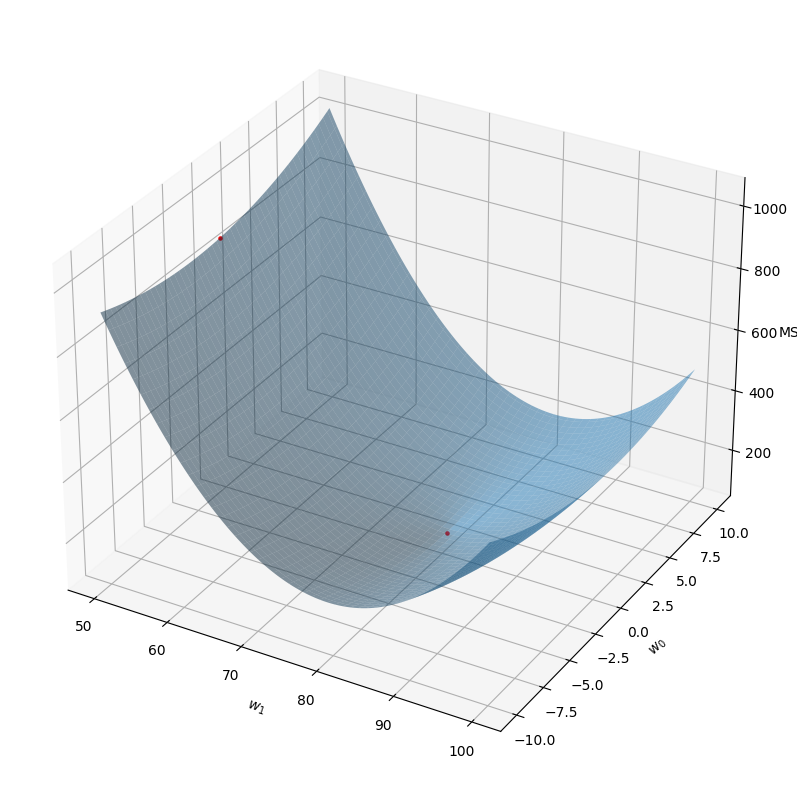

In [38]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w1, w0):
    y_pred = w1 * X[:, 0] + w0
    return np.mean((y - y_pred) ** 2)


coefs_a = np.linspace(50, 100, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, mse(model_a, model_b), c='r', s=5)
ax.scatter(a, b, mse(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('MSE')

plt.show()

И видим, что дейстивительно, модель с коэффициентом `a` равным где-то 80, и с небольшим коэффициентом `b` лучше, чем модель с коэффициентом `a=50`, ведь ошибка у второй модели выше, чем у первой.



#### Градиентный спуск

*Как модель дошла до самой лучшей точки?*

А она обучалась с помощью градиентного спуска - это метод оптимизации.

**Обсудим, что такое градиент и зачем надо спускаться.**

_Градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

К примеру, если функция зависит от трех переменных: $F(x, y, z)$, то её градиент будет равен 

$$\nabla f(x, y, z) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}) $$

При этом, __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

**Градиентный спуск** — метод нахождения локального минимума с помощью движения вдоль градиента.

Давайте попробуем реализовать программно градиентный спуск, чтобы лучше понять как он работает.

Зададим две функции:
1. func - функция параболы $f(x) = x^2$
2. gr_func - производная функции параболы $\nabla f(x) = 2x$

In [39]:
def func(x):
    return x ** 2

# функция градиента
def gr_func(x):
    return 2 * x

Можем отрисовать эту функцию на графике.

Действительно видим параболу.

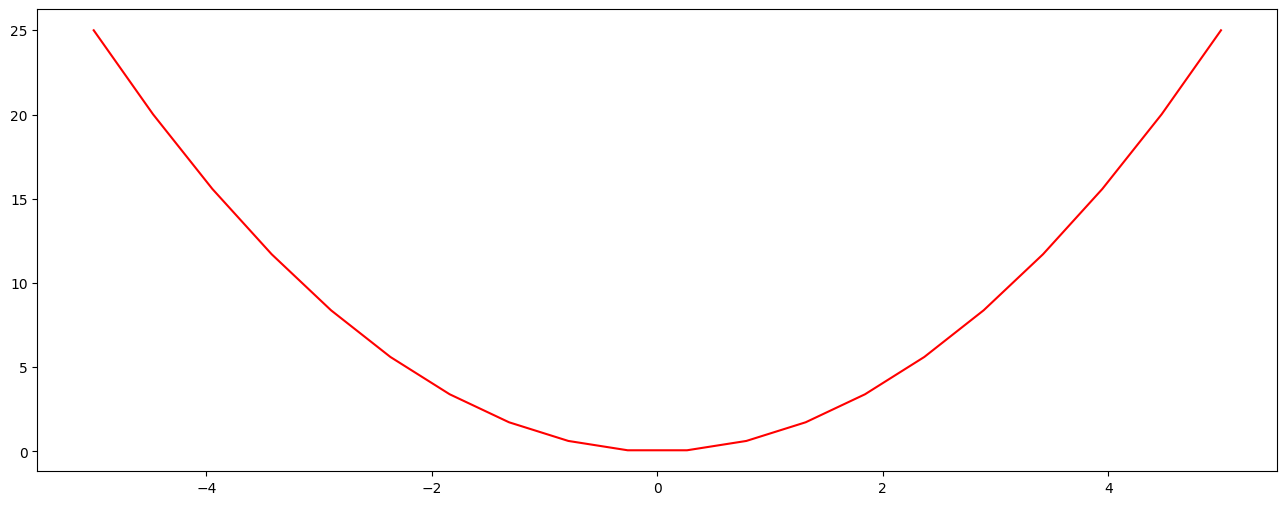

In [40]:
# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)');

Чтобы найти минимум этой функции мы можем воспользоваться методом оптимизации - градиентный спуск, для этого нужно задать начальную точку, откуда будем считать градиенты и скатываться в минимум.

Зеленая звездочка - это и есть точка старта.

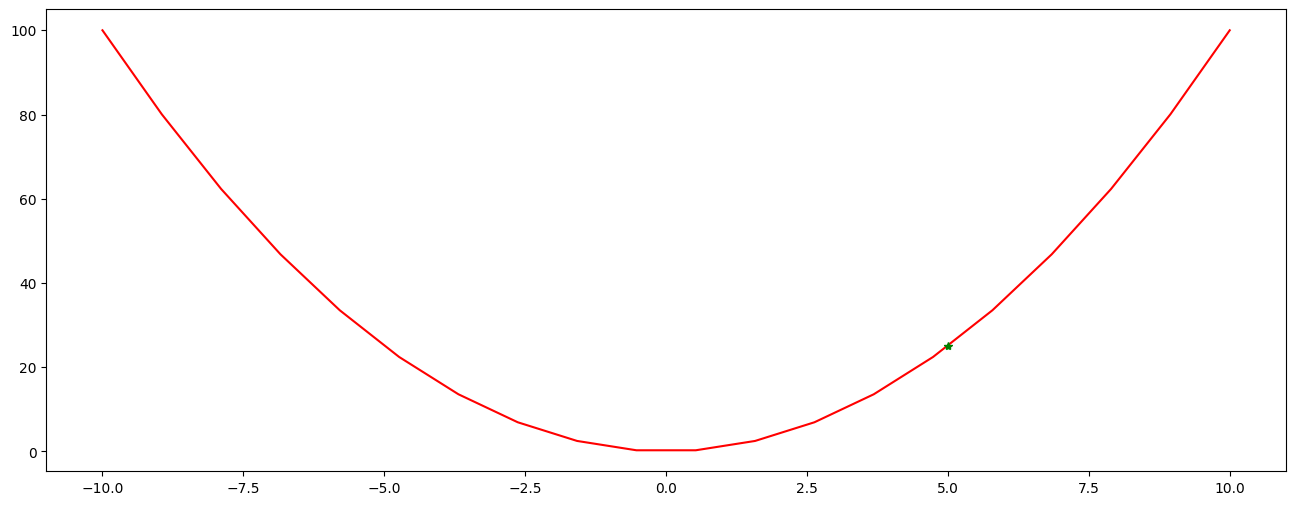

In [41]:
# первоначальное точка
start_point = 5

# для картинки
D = 10

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '-*g', label = 'GD');

Теперь в этой точке можем посчитать градиент.

Он равняется 10, т.к. начальная точка равна 5, а производная будет равняться $\nabla f(x) = 2\cdot x = 2 \cdot 5 = 10$  

In [42]:
grad = gr_func(start_point)
grad

10

Можем отрисовать направление градиента, он показывает наискорейший рост функции и действительно видим, зеленый вектор идет вверх. 

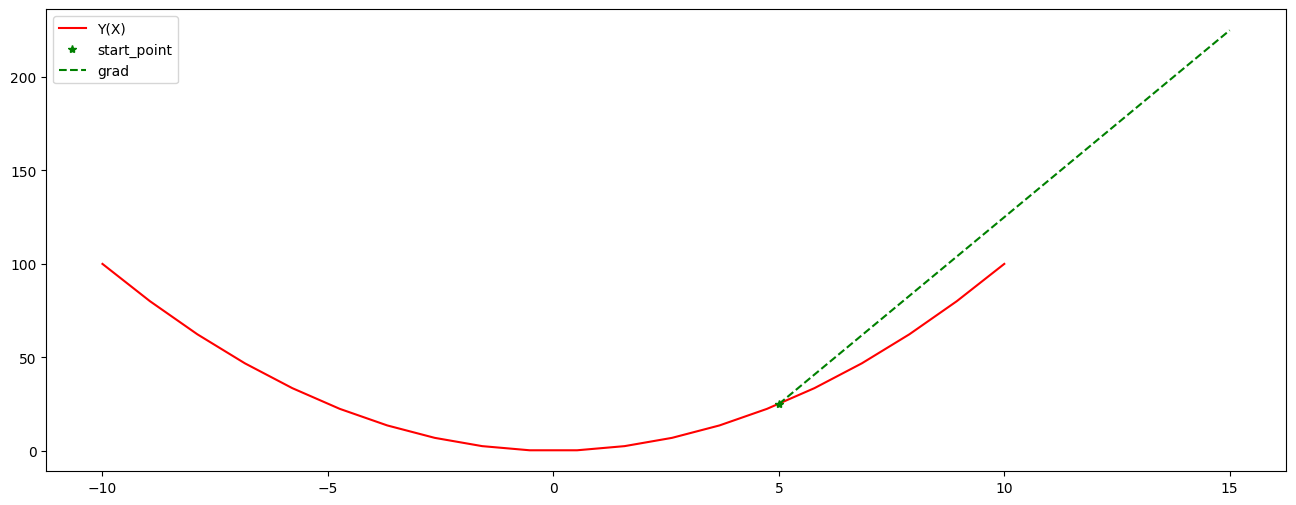

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point + grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположгном направлении, а значит брать **антиградиент**.

Но если мы пойдем от текущей точке $5$ в сторону антиградиента $-10$, то окажемся в точке $-5$, а это так же удалено от минимума, как и наша стартовая точка.

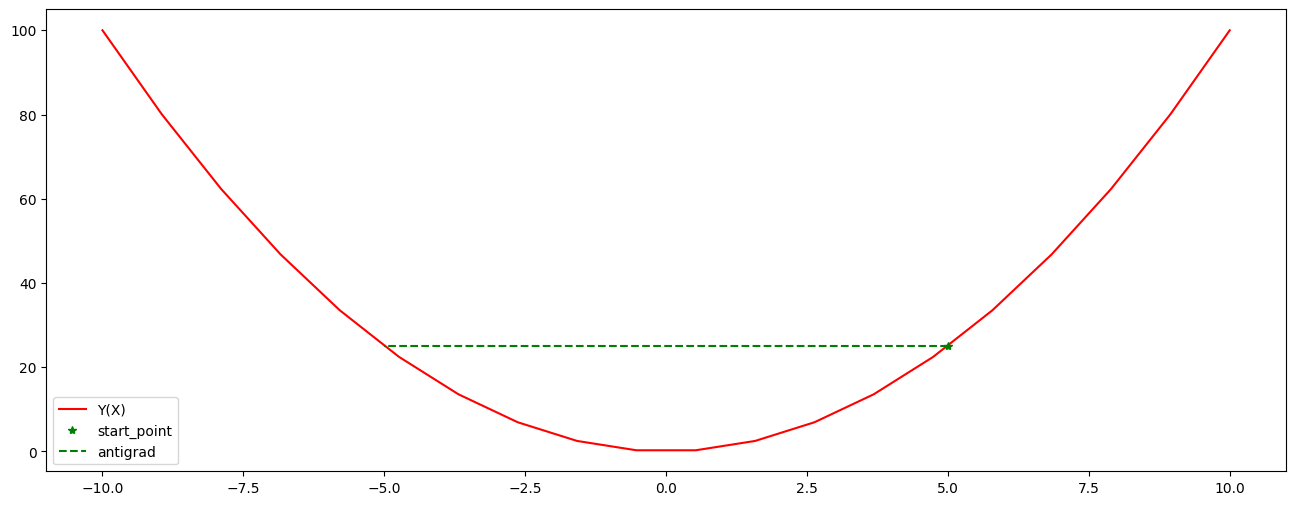

In [44]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='antigrad')
plt.legend();

Поэтому чтобы не перескакивать минимальное состояние функции мы можем делать шаг в сторону антиградиента не полностью, а только на какую-то долю, для этого нужно ввести значения **шага обучения** (скорость обучения, learning rate) - это значения, замедляющее шаги градиентного спуска, чтобы не пропустить локальный минимум. 

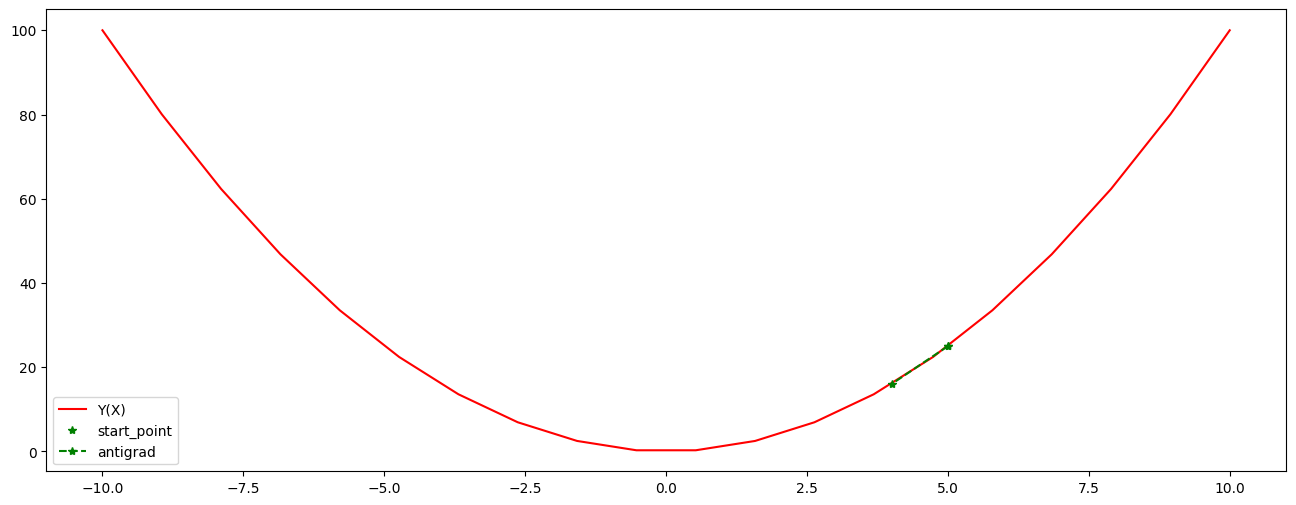

In [45]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - learning_rate * grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*g', label='antigrad')
plt.legend();

Вот мы и получили новую точку с координатой $x=4$. 

Теперь в этой точке можем снова рассчитать значение градиента.

In [46]:
curr_point = next_point_1
curr_point

4.0

In [47]:
grad = gr_func(curr_point)
grad

8.0

Отрисуем направление градиента, который показывает наискорейший рост функции.

А синим пометим уже пройденный шаг.

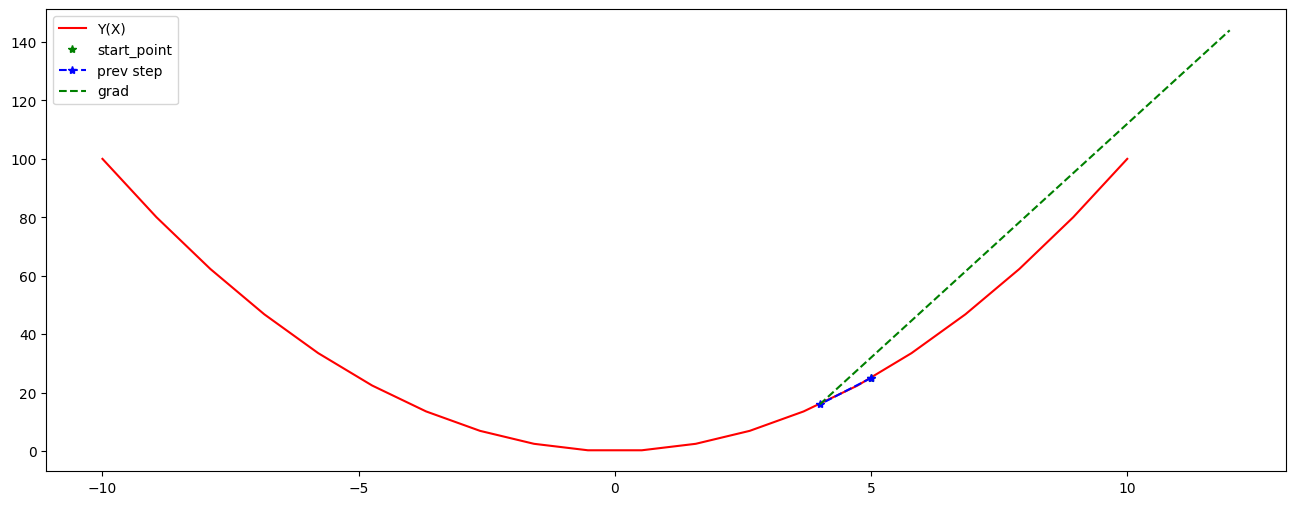

In [48]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point + grad

plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположном направлении, а значит брать **антиградиент**.

Но при этом помним, что если сходить на полный антиградиент, то можем перелететь минимум, поэтому домножим на скорость обучения.

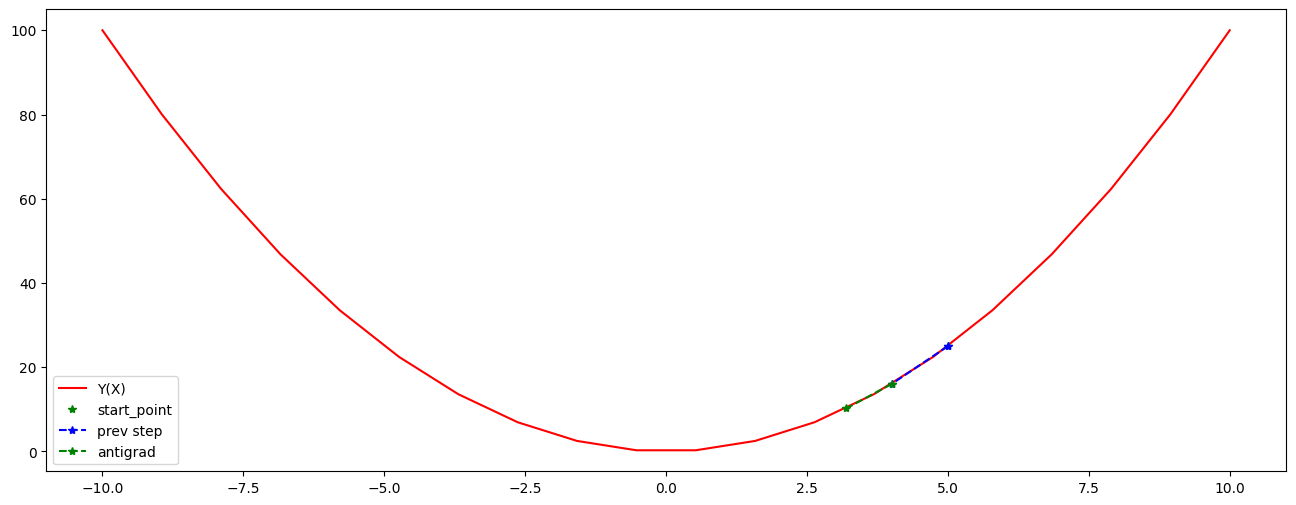

In [49]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point - learning_rate * grad
plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--*g', label='antigrad')
plt.legend();

И получаем еще одну точку, которая уже ближе к минимуму функции.

Оформим небольшой цикл для градиентного спуска.

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

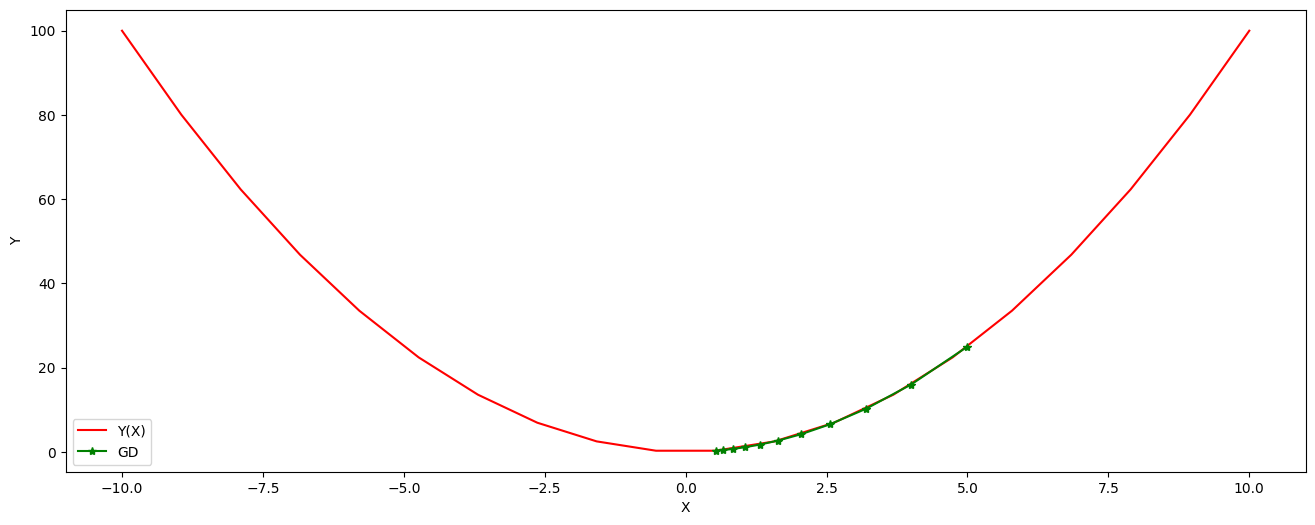

In [50]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Прошли 10 шагов и практически находимся в минимуме функции.

А если мы сделаем больше итераций, то наверняка алгоритм сойдется к 0.


Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

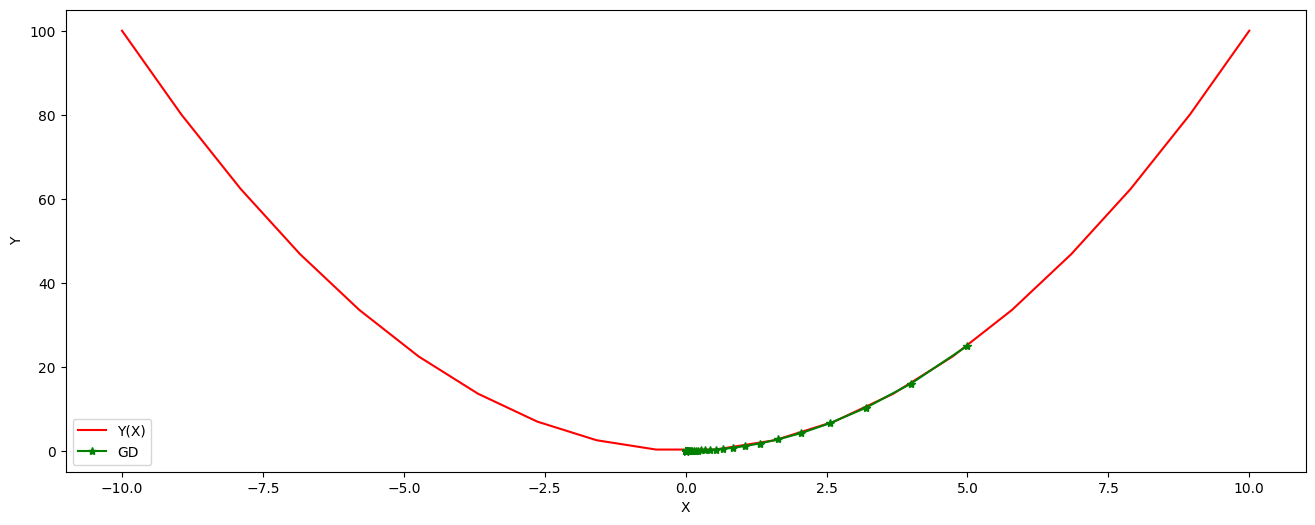

In [51]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)                                    

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Но здесь значения самой лучшей минимальной точки на последних шагах очень похожи и на самом деле мы могли не ждать столько итераций и выйти из цикла раньше.

Для этого введем значение eps, с помощью которого будем проверять разницу между текущей точкой и следующей точкой и если она меньше eps (а значит точки очень близки), то можем выйти из алгоритма.

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

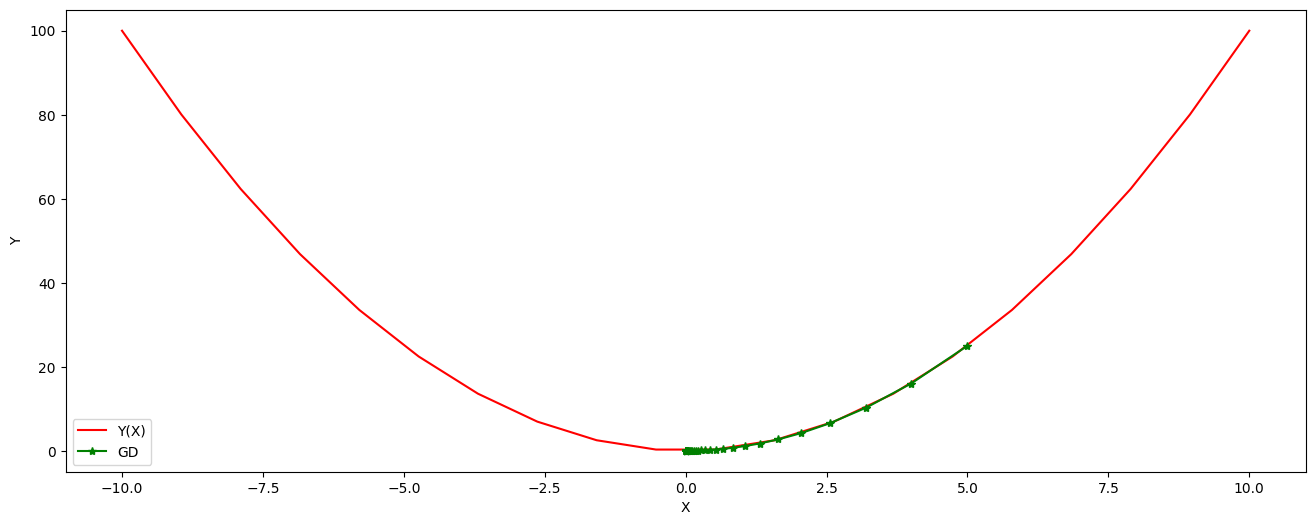

In [52]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    if(abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

И да, алгоритму понадобилось всего лишь 42 итерации, разница между двумя точками оказалась меньше `eps`, а значит можем выйти из цикла схождения алгоритма - это называется критерий останова.

#### Алгоритм градиентного спуска

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- $ w_{k} = w_{k-1} - \eta\nabla f(w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


### Своя реализация линейной регрессии


Теперь зная, как работает метод оптимизации градиентный спуск, можем вернуться к задаче обучения линейной регрессии, но уже не с помощью `sklearn`, а вручную.

Берем те же самые данные, но вдобавок еще возвращем коэффициент наклона (коэффициент сдвига по умолчанию в такой генерации равен 0).

In [53]:
X, y, coeffs = make_regression(n_samples=50, n_features=1, n_informative=1,
                               noise=10, coef=True, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

In [54]:
coeffs

array(80.65667909)

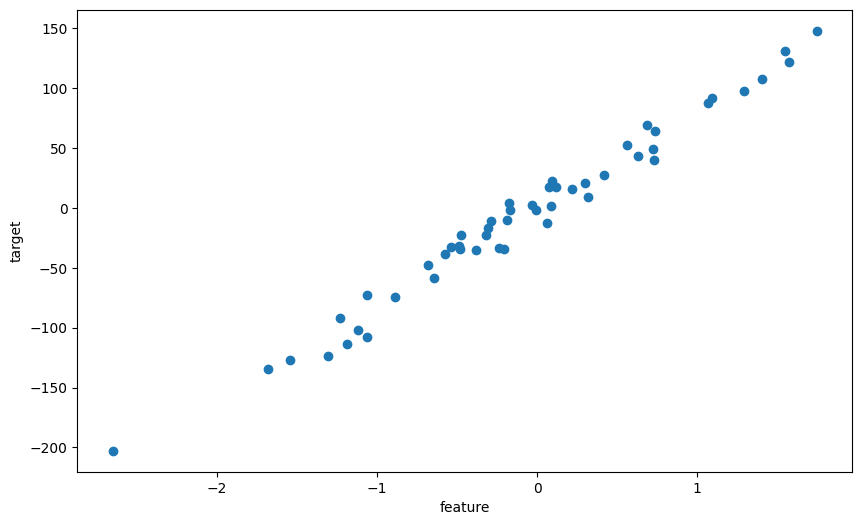

In [55]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

Функция, которую здесь оптимизируем - это MSE, её график для конкретно нашей задачи рисовали выше.

Реализуем две функции:
1. mserror - функция среднеквадратичной ошибки $MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


2. gr_mserror - градиент функции MSE. Распишем его отдельно для коэффициента сдвига и коэффициента наклона:

Сдвиг:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

Наклон:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [56]:
# функция, определяющая среднеквадратичную ошибку
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты, затем на каждом шаге считаем градиент, умножаем его на шаг обучения и вычитаем его из предыдущих значений коэффициентов и так далее пока не поймем, что точки коэффициентов очень похожи друг на друга на соседних итерациях.

In [57]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага (learning rate)
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
# количество итерация 
n = 100
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    # движение в негативную сторону вычисляемого градиента
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}| Следующая точка {next_w1, next_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Итерация: 0
Текущая точка (0, 0)| Следующая точка (13.245106098282543, -1.3921748530551812)
MSE 5436.432058517568
--------------------------------------------------------
Итерация: 1
Текущая точка (13.245106098282543, -1.3921748530551812)| Следующая точка (24.283455474773014, -2.270634896573517)
MSE 3812.4417335187304
--------------------------------------------------------
Итерация: 2
Текущая точка (24.283455474773014, -2.270634896573517)| Следующая точка (33.487719285860635, -2.777322881591963)
MSE 2689.1325642433894
--------------------------------------------------------
Итерация: 3
Текущая точка (33.487719285860635, -2.777322881591963)| Следующая точка (41.166652649401456, -3.0191730536904307)
MSE 1910.2491839412482
--------------------------------------------------------
Итерация: 4
Текущая точка (41.166652649401456, -3.0191730536904307)| Следующая точка (47.57624618267611, -3.0762482285482444)
MSE 1368.9634120527255
--------------------------------------------------------
Итерац

А мы получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

Сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [58]:
print('Коэффициенты наклона', end=' ')
print(f'True {coeffs}, trained {next_w1}')

print('Коэффициенты сдвига', end=' ')
print(f'True 0, trained {next_w0}')

Коэффициенты наклона True 80.65667909277211, trained 80.41811391254866
Коэффициенты сдвига True 0, trained 0.18151025367739462


А они очень похожи.

А визуализированные кривые наслаиваются друг на друга

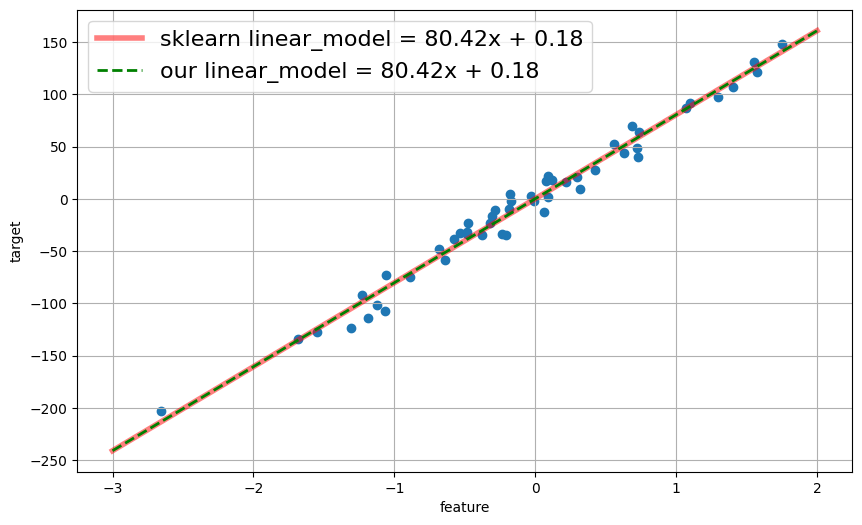

In [59]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
our_model_y = next_w1 * x + next_w0

plt.plot(x, model_y_sk, linewidth=4, alpha=0.5, c='r', label=f'sklearn linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.plot(x, our_model_y, '--g', linewidth=2, label=f'our linear_model = {next_w1:.2f}x + {next_w0:.2f}')
plt.scatter(X, y) 
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

## Многомерная линейная регрессия

Сейчас мы посмотрели на то, как обучается линейная регрессия для задач с одним признаком.

Построим себе данные поинтересней, состоящие из 4 признаков, это уже отрисовать не сможем.



In [60]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=4, n_informative=4,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

### Из sklearn

Обучим для начала модель из `sklearn`

In [61]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Посмотрим обученные коэффициенты и теперь давайте их называть весами.

Есть веса при признаках - это и есть коэффициенты наклона но по каждой оси.

И есть один свободный вес - коэффициент сдвига.

Получаем 4 веса при признаках - значения для каждого признака, которые сообщают, насколько нужно наклонить прямую относительно каждой оси.

И один сдвиг - свободный вес.

In [62]:
model.coef_, model.intercept_

(array([59.51225616, 57.72556421, 44.70715115, 24.87193091]),
 -1.6392969526147114)

Можем сделать предсказания этой моделью, сначала через метод `predict`.

In [63]:
model.predict(X[:1])

array([37.14897504])

А теперь с помощью перемножения весов на признаки, суммирования их и добавления свободного веса.

In [64]:
np.sum(model.coef_ * X[0]) + model.intercept_

37.1489750426928

Давайте посчитаем ошибку на предсказаниях модели, при этом получим предсказания не одним способом (через `model.predict`), а еще и вторым, сами перемножим веса (`model.coef_`) на значения признаков (`X`) и добавим значение сдвига (`model.intercept_`)

Выходит, что неважно, как мы получаем предсказания они всё равно одинаковые.

In [65]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = model.predict(X)
df['pred_dot'] = X.dot(model.coef_) + model.intercept_

df.head()

,0,1,2,3,y,pred_fit,pred_dot
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992


Посчитаем отклонения предсказаний от истины.

In [ ]:
df['residual'] = df['pred_fit'] - df['y']
df.head()

,0,1,2,3,y,pred_fit,pred_dot,residual
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975,-6.450099
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654,-3.810959
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486,0.329057
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454,5.058363
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992,6.316763


И на всех объектах считаем метрику MSE - mean squared error, напомню, что более подробно про неё рассказываю в этом [видео](https://youtu.be/vh2smjQyhp8) и в этом [ноутбуке](https://colab.research.google.com/drive/14Oxi6sI25mP4JbovLiJ57e7H5sbN2I3p).

MSE равняется.

In [ ]:
np.mean(df['residual'] ** 2)

92.64429127220507

### Своя реализация линейной регрессии

Берем те же самые данные, где брали 4 признака, но еще возвращаем веса при признаках, а свободный вес по умолчанию в такой генерации равен 0.

In [ ]:
X, y, coeffs = make_regression(n_samples=50, n_features=4, n_informative=4,
                               noise=10, coef=True, random_state=11)

display(X, y)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

In [ ]:
coeffs

array([59.32158596, 58.74342238, 44.07539836, 25.03682142])

Для удобства реализации градиентного спуска от записи поэлементной через сумму ($MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2$) перейдем к матричной форме записи.

Предсказания линейной модели - это перемножение весов на признаки плюс свободный вес.

$$y_{pred} = X\cdot w + w_0$$

При этом очень важно, чтобы соблюдались размерности матрицы $X$ и вектора $w$.
У нас размерности равны

In [ ]:
X.shape, coeffs.shape

((50, 4), (4,))

А значит, чтобы объеты могли матрично перемножиться, нужно чтобы количество столбцов первой матрицы было равно количеству строк второй (но у нас не матрица, а вектор).

У нас совпадают, так что можем их перемножать и получаем ничто иное, как *скалярное произведение* - все значения в признаках перемножаются на соответсвующие веса и складываются.


А значит можем переписать формулу:
$$y_{pred} = \langle X, w\rangle + w_0$$


Но вот только мешается свободный вес. Можно пойти на одну хитрость и добавить фиктивный признак в данные, который для каждого объекта равен 1.



In [ ]:
X = np.column_stack([X, np.ones((50))])
X

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699,  1.        ],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ,  1.        ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ,  1.        ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254,  1.        ],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489,  1.        ],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858,  1.        ],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514,  1.        ],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215,  1.        ],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692,  1.        ],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398,  1.        ],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163,  1.        ],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665,  1.        ],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487,  1.        ],
       [-1.0616544 , -0.68448467, -0.4

И теперь всё предсказание линейной модели будет равняться:

$$y_{pred} = \langle X, w\rangle$$


А наша ошибка MSE преобразиться и будет выглядить следующим образом:

$$MSE = \frac{1}{n}\sum^{n}_{i=1}(y_{i} - \text{y_pred}_i)^{2} = \frac{1}{n}\sum^{n}_{i=1}(y_{i} -  \langle X_i, w\rangle)^{2} =  \frac{1}{n}||Y -  X w||^{2}$$


где используется $L_{2}$ норма:

$$||Y -  X w|| = \sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(y_i-X_iw)^2}$$



Реализуем две функции только уже с матричными операциями:
1. mserror_mat - функция среднеквадратичной ошибки для матриц


2. gr_mserror_mat - градиент функции MSE для матрицы:

$\frac{∂ MSE}{∂ w} = \frac{1 \cdot 2}{n}({Y - Xw}) \cdot-X$



In [ ]:
# функция, определяющая среднеквадратичную ошибку
def mserror_mat(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror_mat(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)

И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты. Т.к. у нас 5 признаков (4 настоящих плюс один фиктивный), то будет 5 весов.

In [ ]:
# первоначальное точка
weights = np.zeros(X.shape[1])
weights

array([0., 0., 0., 0., 0.])

Затем запускаем цикл по обучению и меняем веса, при этом не каждый вес отдельно, а все веса сразу вместе.

И если веса начнут плохо изменяться, то можем выйти по критерию останова:

$$||w_{new} - w_{old}|| ≤ eps$$

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# размер шага (learning rate)
learning_rate = 0.1

next_weights = weights
# количество итерация 
n = 100
for i in range(n):
    cur_weights = next_weights

    # движение в негативную сторону вычисляемого градиента
    next_weights = cur_weights - learning_rate * gr_mserror_mat(X, cur_weights, y)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_weights}| Следующая точка {next_weights}")
    print(f"MSE {mserror_mat(X, cur_weights, y)}")
    print("--------------------------------------------------------")
    
    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Итерация: 0
Текущая точка [0. 0. 0. 0. 0.]| Следующая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]
MSE 7901.284047919273
--------------------------------------------------------
Итерация: 1
Текущая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]| Следующая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]
MSE 5491.413352110748
--------------------------------------------------------
Итерация: 2
Текущая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]| Следующая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]
MSE 3846.369420368778
--------------------------------------------------------
Итерация: 3
Текущая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]| Следующая точка [34.38479911 26.29452131 22.40202941 10.84471509 -2.06001325]
MSE 2714.9929661406427
--------------------------------------------------------
Итерация: 4
Текущая точка [34.38479911 26.29452131 22.402029

Вышли раньше из обучения, т.к. веса перестали сильно изменяться и мы стали топтаться на одном месте.

И получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

И давайте сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [ ]:
print('Веса при признаках')
print(f'True {coeffs},\nTrained {next_weights[:-1]}')

print('\nВес свободный', end=' ')
print(f'True 0, trained {next_weights[-1]}')

Веса при признаках
True [59.32158596 58.74342238 44.07539836 25.03682142],
Trained [59.51242524 57.72548719 44.70646353 24.87225898]

Вес свободный True 0, trained -1.6396678387172876


## Практика
Практика доступна на платформе https://boosty.to/machine_learrrning/posts/f3212700-6f98-4c2f-9627-7629d9d8114d

Доступна
1. по подписке уровня light+ и выше
2. разовая оплата


## Summary

Вот мы и разобрались, как обучается модель линейная регрессия
1. Для одного признака
    - Ищется вес при признаке, он же коэффициент наклона y=**a**x + b
    - Ищется свободный вес, он же коэффициент сдвига y=ax + **b**
2. Для большого количества признаков
    - Ищутся веса при признаках, они же коэффициенты наклона для каждого признака y=X**w** + w_0
    - Ищется свободный вес, он же коэффициент сдвига y=Xw + **w_0**
    - При этом свободный вес можно положить в матричное перемножение Xw, если создадим фиктивный признак
3. Обучение линейной регрессии производится с помощью **градиентного спуска**
    - Градиент - вектор частных производных
    - Градиентный спуск - итеративный процесс нахождения минимума функции

Муррр ♥